## The purpose of this notebook is it to illustrate statistical distributionthrough numerical sampling. Various level of complexity are shown. The first cell only shows the result of the sampling process and plot it. The second cell add animation to the plot to actually witness the sampling process. The last cell adds the potential for interactivity by allowing the user to manually select the parameters of the distribution via a slider. 

<IPython.core.display.Javascript object>


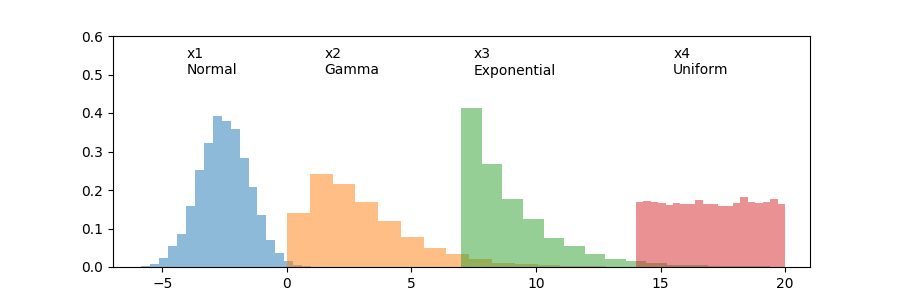

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


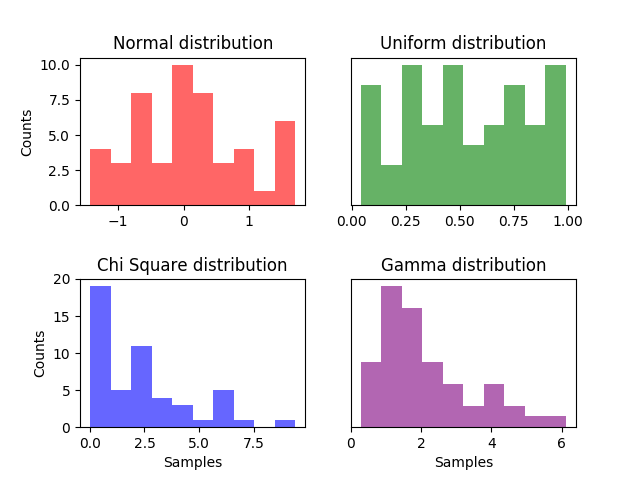

In [2]:
# creation of a subplot interactively showing the sampling from different statistical distributions
import numpy as np
import matplotlib.animation as animation

n = 50
normal = np.random.normal(loc=0.0, scale=1.0, size= n)
uniform = np.random.random(size=n)
chi_square = np.random.chisquare(2,n) # degree 2
gamma = np.random.gamma(2, size=n)

distributions = [normal, uniform, chi_square, gamma]
distributions_names= ["Normal", "Uniform", "Chi Square", "Gamma"]
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=-1, codec="libx264")
color = ["red", "green", "blue", "purple"]

def update_custom(current_frame):
    if current_frame == n:
        a.event_source.stop()
   
    
    for i,ax in enumerate(axes):
        ax.cla() # necessary to avoid overlapping different plots on top of each other !!
        #ax.hist(distributions[i][:current_frame], bins = np.arange(-5,5,0.5))
        ax.hist(distributions[i][:current_frame], color=color[i], alpha=0.6)
        #ax.axis([-5,5,0,20])
        ax.set_title("{} distribution".format(distributions_names[i]))
        #ax.set_ylim([0,50])
        
        if i %2 == 0:
            ax.set_ylabel("Counts")
        else:
            ax.tick_params(axis="y", which="both", left="off", labelleft="off")
        if i >= 2:
            ax.set_xlabel("Samples")
    
    #ax1.annotate("n={}".format(current_frame), [1,40])
    
fig, ((ax1,ax2), (ax3,ax4))= plt.subplots(2,2)
plt.subplots_adjust(hspace=0.5)
axes = [ax1, ax2, ax3, ax4]
a = animation.FuncAnimation(fig, update_custom, interval=25) #interval is the frame rate in ms
#a.save('stats.mp4', writer=writer)

<IPython.core.display.Javascript object>


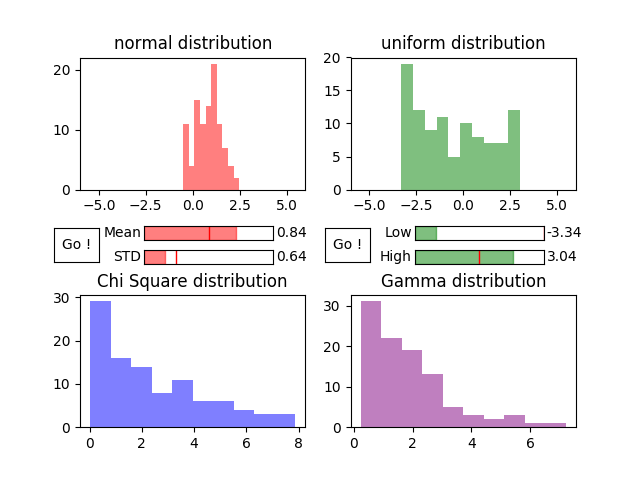

0

In [3]:
# example of script to create a slider that allows parametrization of distributions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import matplotlib.animation as animation

n = 100
normal = np.random.normal(loc=0.0, scale=1.0, size= n)
uniform = np.random.random(size=n)
chi_square = np.random.chisquare(2,n) # degree 2
gamma = np.random.gamma(2, size=n)
distributions = [normal, uniform, chi_square, gamma]
distributions_names= ["Normal", "Uniform", "Chi Square", "Gamma"]
color = ["red", "green", "blue", "purple"]


fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2)
axes = [ax1,ax2,ax3,ax4]
plt.subplots_adjust(hspace=0.8)

for i,ax in enumerate(axes):
    
    ax.hist(distributions[i], color = color[i], alpha=0.5)
    ax.set_title("{} distribution".format(distributions_names[i]))


# Slider creation


###################################################################################
## Normal distribution
axcolor = 'white'
pos_ax1 = ax1.get_position()


axmean = plt.axes([pos_ax1.x0 + 0.1, 0.5, pos_ax1.x1 - pos_ax1.x0 - 0.15, 0.03], facecolor=axcolor) # add axes to current figure
axvar = plt.axes([pos_ax1.x0 + 0.1, 0.45, pos_ax1.x1 - pos_ax1.x0 -0.15, 0.03], facecolor=axcolor)
update_normal_axis = plt.axes([pos_ax1.x0 - 0.04, 0.455, 0.07, 0.07])
button_normal = Button(update_normal_axis, "Go !", color = axcolor, hovercolor= "red")

smean = Slider(axmean, "Mean", -2,2, valinit=0.0, color=color[0], alpha= 0.5)
svar = Slider(axvar, "STD", 0,4, valinit=1.0, color=color[0], alpha= 0.5)
#####################################################################################
## Uniform distribution

axcolor = 'white'
pos_ax2 = ax2.get_position()
axlow = plt.axes([pos_ax2.x0 + 0.1, 0.5, pos_ax2.x1 - pos_ax2.x0 - 0.15, 0.03], facecolor=axcolor) # add axes to current figure
axhigh = plt.axes([pos_ax2.x0 + 0.1, 0.45, pos_ax2.x1 - pos_ax2.x0 -0.15, 0.03], facecolor=axcolor)

update_uniform_axis = plt.axes([pos_ax2.x0 - 0.04, 0.455, 0.07, 0.07])
button_uniform = Button(update_uniform_axis, "Go !", color=axcolor, hovercolor = color[1])

Slow = Slider(axlow, "Low", -4,0, valinit=0.0, color=color[1], alpha=0.5)
Shigh = Slider(axhigh, "High", 0,4, valinit=2.0, color=color[1], alpha=0.5)



normal_anim = None
uni_anim = None

def custom(current_frame, axis,distribution, name, color):
    
    if current_frame == n:
        a.event_source.stop()
        
    axis.cla()
    axis.hist(distribution[:current_frame], color=color, alpha=0.5)
    axis.set_xlim([-6,6])
    axis.set_title("{} distribution".format(name))
    
def update_normal(val):
    
    normal = np.random.normal(loc=smean.val, scale=svar.val, size= n)
    global normal_anim
    normal_anim = animation.FuncAnimation(plt.gcf(), custom, fargs=(ax1,normal,"normal","red"),interval=25) #interval is the frame rate in ms

def update_uniform(val):
    uniform = np.random.uniform(Slow.val, Shigh.val,size=n)
    global uni_anim
    uni_anim = animation.FuncAnimation(plt.gcf(), custom, fargs=(ax2,uniform,"uniform","green"), interval=25)
    
button_normal.on_clicked(update_normal)
button_uniform.on_clicked(update_uniform)
#smean.on_changed(update_normal) # call func with the new slider value
#svar.on_changed(update_normal)

